In [1]:
cd ..

/tudelft.net/staff-bulk/ewi/insy/DBL/alexeygritsenko/src/IRES_Predictor-stripped/python


In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pylab
import matplotlib.pyplot as plot 
import matplotlib.colors

import numpy as np
import scipy.stats

In [4]:
import paper
import lib.regression

** Checking datasets **

/opt/insy/env.el7/sys_enhance/lib/python2.7/site-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


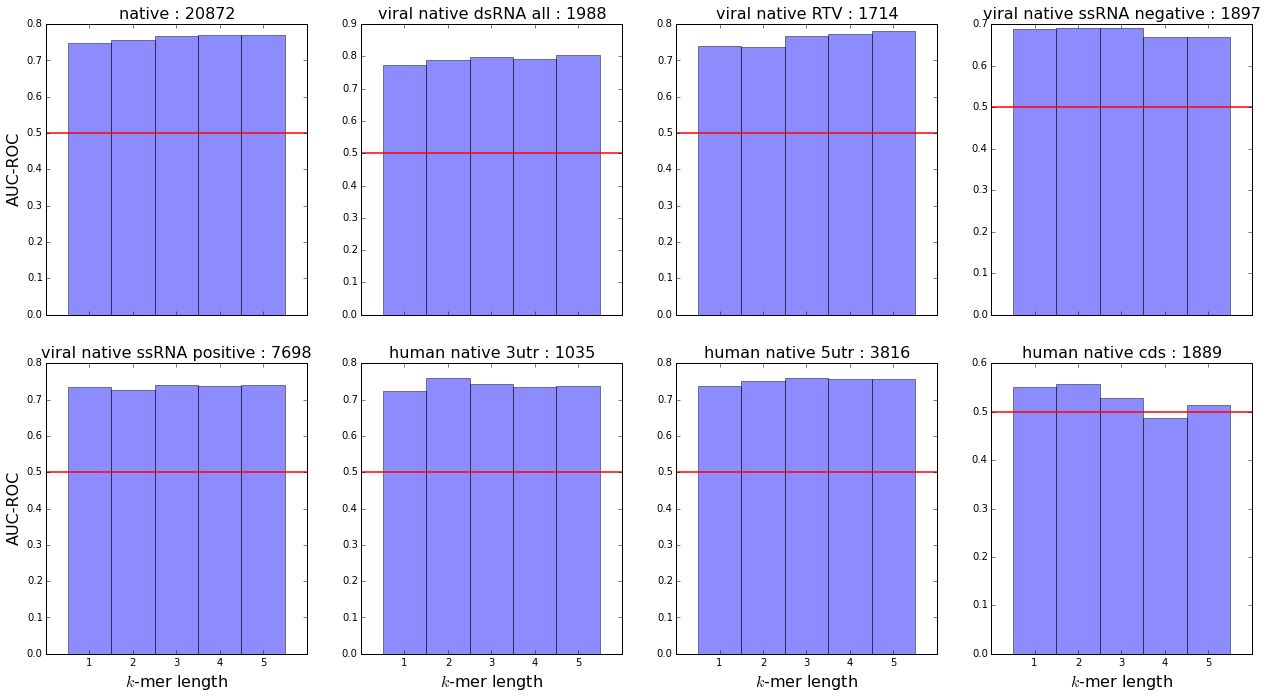

In [5]:
paper.plot_final_predictor_performance(['native',
                                        'viral_native_dsRNA_all',
                                        'viral_native_RTV',
                                        'viral_native_ssRNA_negative',
                                        'viral_native_ssRNA_positive',
                                        'human_native_3utr',
                                        'human_native_5utr',
                                        'human_native_cds'],
                                      metric='auc-roc')

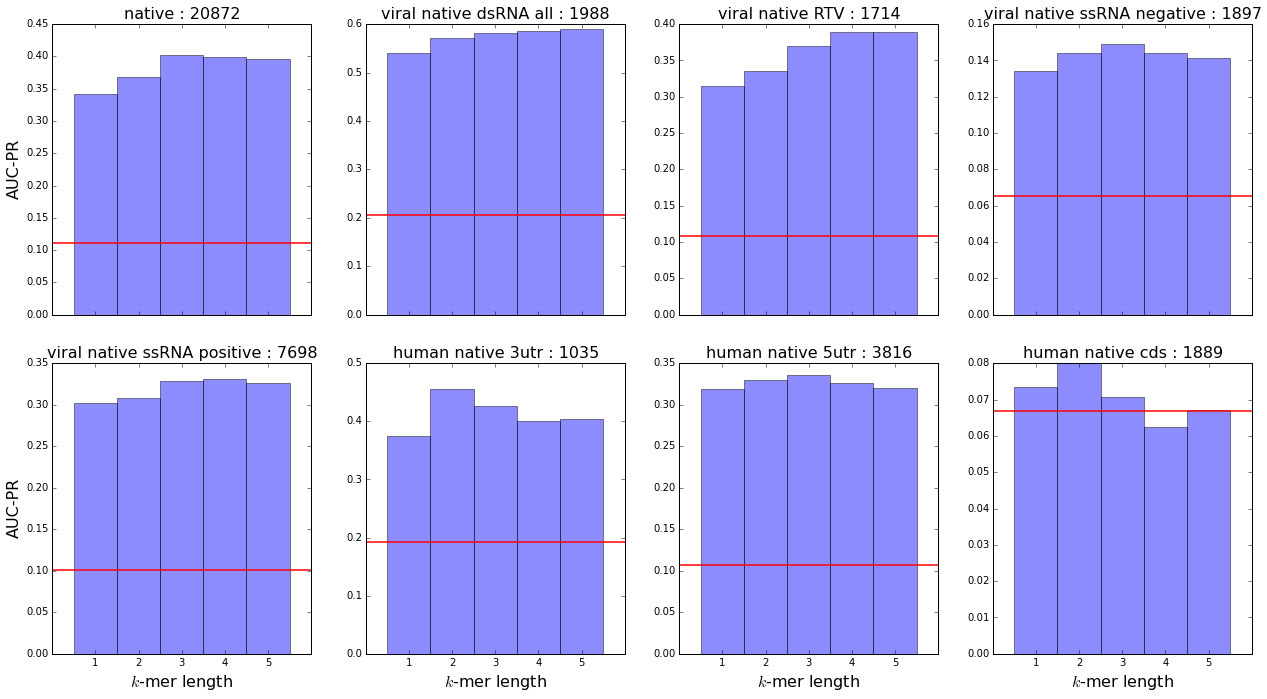

In [6]:
paper.plot_final_predictor_performance(['native',
                                        'viral_native_dsRNA_all',
                                        'viral_native_RTV',
                                        'viral_native_ssRNA_negative',
                                        'viral_native_ssRNA_positive',
                                        'human_native_3utr',
                                        'human_native_5utr',
                                        'human_native_cds'],
                                      metric='auc-pr')

[i] human_native_5utr + kmers_kmers-windows (k=4) : 0.11
[i] human_native_3utr + kmers_kmers-windows (k=4) : 0.13
[i] viral_native_dsRNA_all + kmers_kmers-windows (k=4) : 0.30
[i] viral_native_RTV + kmers_kmers-windows (k=4) : 0.16
[i] viral_native_ssRNA_positive + kmers_kmers-windows (k=4) : 0.13


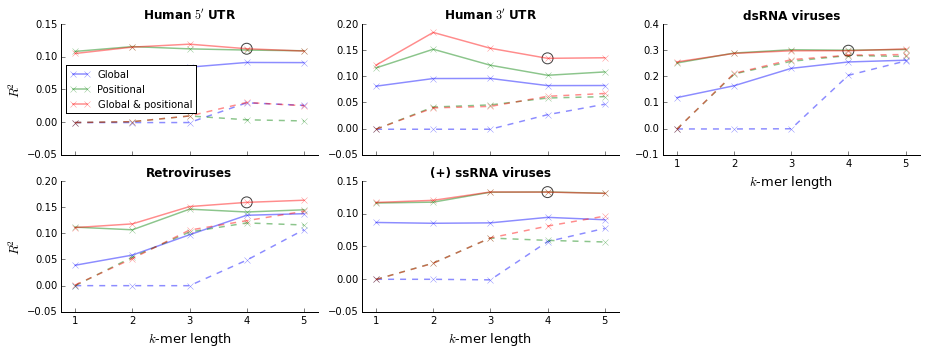

In [46]:
# GBRF
paper.plot_dataset_feature_combination_performance(save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/gbrf-performance-font_size.pdf')

[i] native + kmers_kmers-windows (k=4) : 0.18


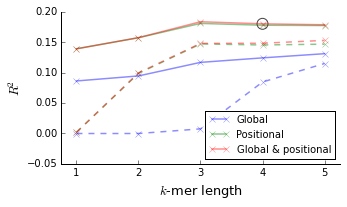

In [48]:
# GBRF
paper.plot_dataset_feature_combination_performance(
    dataset_names = ['native'],
    dataset_labels = [''],
    marks = [4],
    save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/gbrf-performance-native-font_size.pdf')

[i] human_native_5utr + kmers_kmers-windows (k=4) : 0.34
[i] human_native_3utr + kmers_kmers-windows (k=4) : 0.37
[i] viral_native_dsRNA_all + kmers_kmers-windows (k=4) : 0.55
[i] viral_native_RTV + kmers_kmers-windows (k=4) : 0.40
[i] viral_native_ssRNA_positive + kmers_kmers-windows (k=4) : 0.36


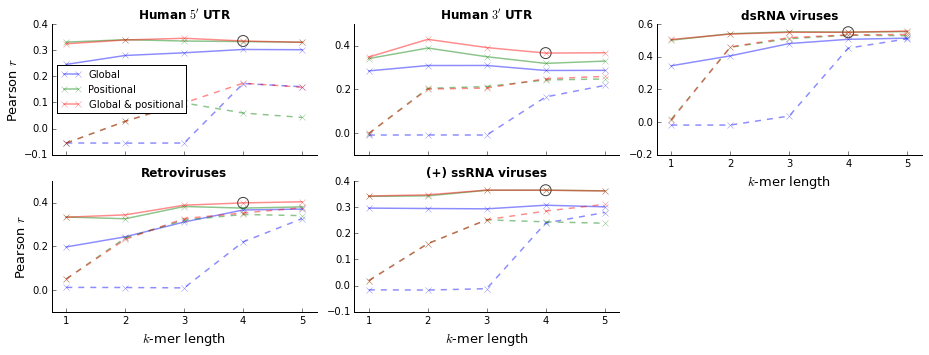

In [52]:
# GBRF
paper.plot_dataset_feature_combination_performance(chosen_metric='pearson', metric_label='Pearson $r$')

[i] native + kmers_kmers-windows (k=4) : 0.43


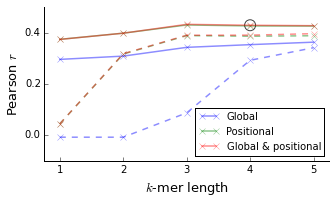

In [53]:
# GBRF
paper.plot_dataset_feature_combination_performance(
    dataset_names = ['native'],
    dataset_labels = [''],
    marks = [4],
    chosen_metric='pearson',
    metric_label='Pearson $r$')

** SVR performance plot **

[i] native + kmers_kmers-windows (k=5) : 0.05
[i] human_native_5utr + kmers_kmers-windows (k=5) : 0.02
[i] human_native_3utr + kmers_kmers-windows (k=5) : 0.06
[i] viral_native_dsRNA_all + kmers_kmers-windows (k=5) : 0.20
[i] viral_native_RTV + kmers_kmers-windows (k=5) : 0.00
[i] viral_native_ssRNA_positive + kmers_kmers-windows (k=5) : 0.03


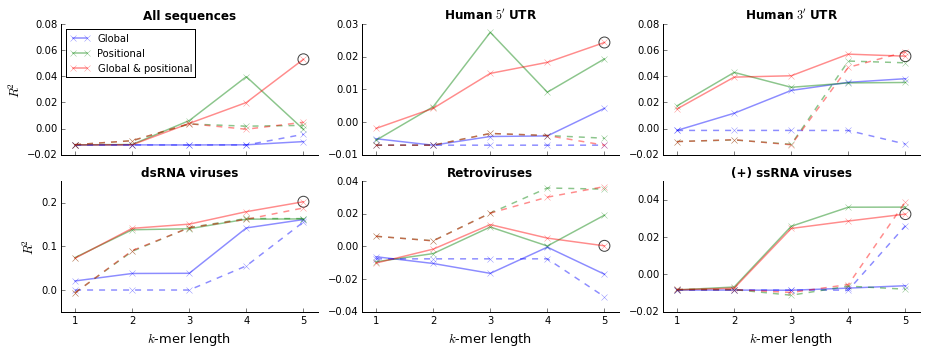

In [11]:
# SVR

res = ('without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
       'grid_search_settings_pcb-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh')

dataset_names = ['native', 'human_native_5utr', 'human_native_3utr', 'viral_native_dsRNA_all', 'viral_native_RTV', 'viral_native_ssRNA_positive']
dataset_labels = ['All sequences', "Human $5'$ UTR", "Human $3'$ UTR", 'dsRNA viruses', 'Retroviruses', '(+) ssRNA viruses']

paper.plot_dataset_feature_combination_performance(dataset_names=dataset_names,
                                                   dataset_labels=dataset_labels,
                                                   plot_gbrf=False,
                                                   results=res,
                                                   marks=[5] * 6,
                                                   save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/svr-r2.pdf')

native
human_native_5utr
human_native_3utr
viral_native_dsRNA_all
viral_native_RTV
viral_native_ssRNA_positive


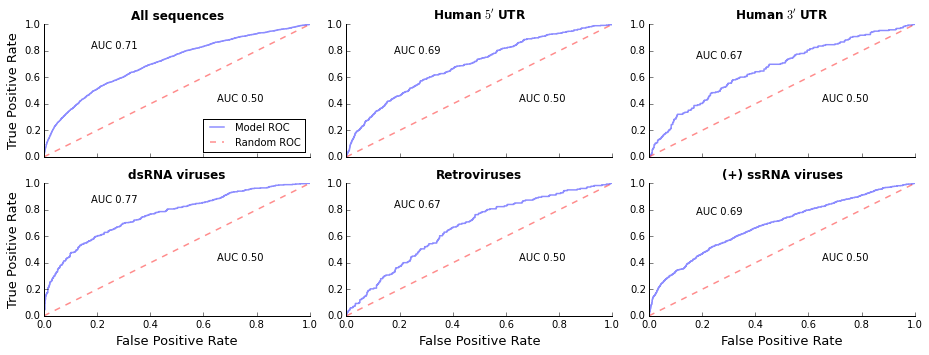

In [63]:
figure = '/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/svr-auc-roc.pdf'

res = ('without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
       'kmers_kmers-windows',
       1,
       'grid_search_settings_pcb-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh')

paper.plot_final_predictor_roc_performance(dataset_names=dataset_names,
                                           dataset_labels=dataset_labels,
                                           results=res,
                                           kmer_sizes=[5] * 6,
                                           save_filename=figure,
                                           plot_gbrf=False)

native
human_native_5utr
human_native_3utr
viral_native_dsRNA_all
viral_native_RTV
viral_native_ssRNA_positive


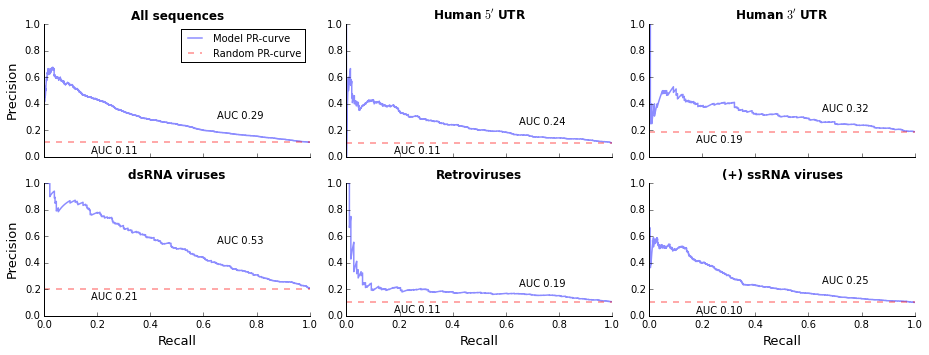

In [59]:
figure = '/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/svr-auc-pr.pdf'

res = ('without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
       'kmers_kmers-windows',
       1,
       'grid_search_settings_pcb-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh')

paper.plot_final_predictor_roc_performance(dataset_names=dataset_names,
                                           dataset_labels=dataset_labels,
                                           results=res,
                                           kmer_sizes=[5] * 6,
                                           save_filename=figure,
                                           plot_gbrf=False,
                                           metric='pr')

Plotting native
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
Plotting human_native_5utr
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
Plotting human_native_3utr
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
Plotting viral_native_dsRNA_all
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
Plotting viral_native_RTV
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
Plotting viral_native_ssRNA_positive
fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9


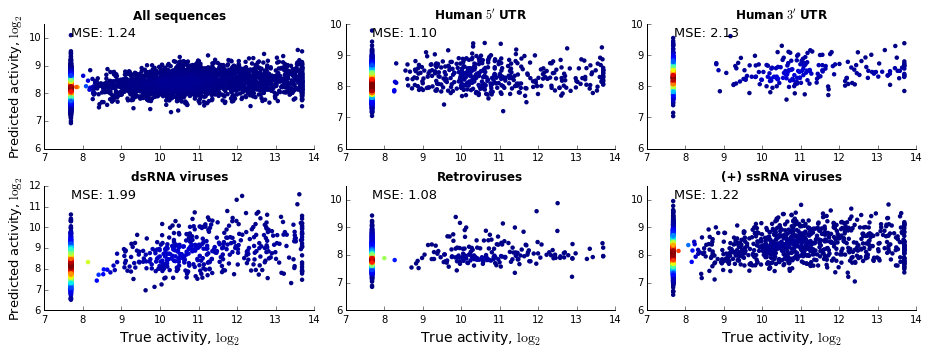

In [50]:
res = ('without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
       'kmers_kmers-windows',
       'grid_search_settings_pcb-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh')


paper.plot_scatterplot_for_datasets(dataset_names=['native', 'human_native_5utr', 'human_native_3utr', 'viral_native_dsRNA_all', 'viral_native_RTV', 'viral_native_ssRNA_positive'],
                                    dataset_labels=['All sequences', "Human $5'$ UTR", "Human $3'$ UTR", 'dsRNA viruses', 'Retroviruses', '(+) ssRNA viruses'],
                                    results=res,
                                    chosen_kmers=[5] * 6,
                                    show_mse=True,
                                    save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/svr-subgroups-scatter.pdf',
                                    plot_gbrf=False)




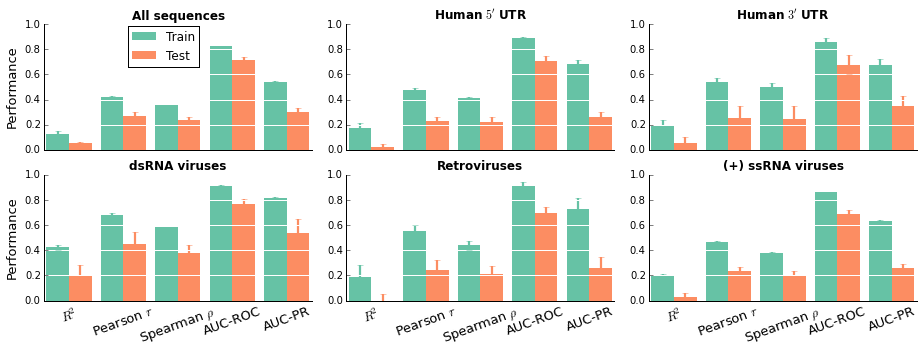

In [81]:
res = ('without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
       'kmers_kmers-windows',
       'grid_search_settings_pcb-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh')


paper.plot_regression_performance_for_datasets(dataset_names=['native', 'human_native_5utr', 'human_native_3utr', 'viral_native_dsRNA_all', 'viral_native_RTV', 'viral_native_ssRNA_positive'],
                                               dataset_labels=['All sequences', "Human $5'$ UTR", "Human $3'$ UTR", 'dsRNA viruses', 'Retroviruses', '(+) ssRNA viruses'],
                                               results=res,
                                               chosen_kmers=[5] * 6,
                                               plot_gbrf=False,
                                               save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/svr-subgroups-performance.pdf')

** SVR - GBRF comparison **

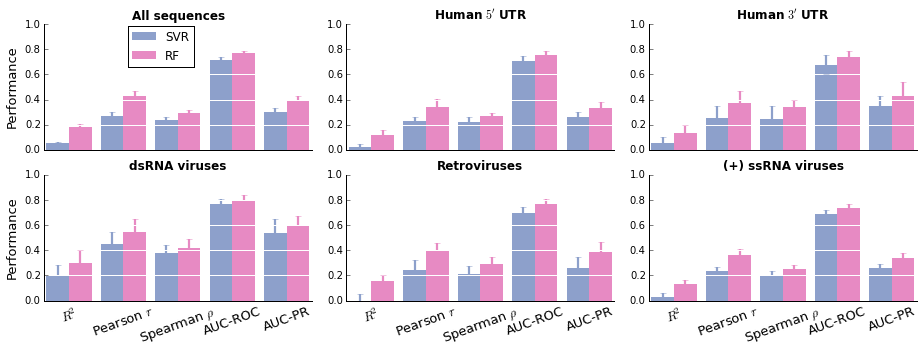

In [18]:
desc_svr = {'configuration_name': 'without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
            'feature_names':'kmers_kmers-windows',
            'experiment': 'grid_search_settings_pcb-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh',
            'chosen_kmers': [5] * 6,
            'min_kmer_length' : 1
           }

desc_rf = {'configuration_name': 'without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2',
           'feature_names':'kmers_kmers-windows',
           'experiment': 'sqrt_eran_refined2-1k-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh',
           'chosen_kmers': [4] * 6,
           'min_kmer_length' : 1
          }


paper.plot_svr_rf_performance_comparison_for_datasets(
    desc_svr,
    desc_rf,
    save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/svr-rf-subgroups-performance.pdf')

** Fraction of sequences with k-mers of length k **

In [86]:
def fraction_of_kmers(dataset_name,
                      min_kmer_length=1,
                      max_kmer_length=3,
                      window_size=20,
                      window_step=10,
                      alphabet=['A', 'C', 'T', 'G']):
    import lib.kmers
    import lib.persistent
    import pysais
    
    alphabet_size = len(alphabet)
    start = 0 
    for i in range(1, min_kmer_length):
        start += alphabet_size ** i
    stop = 0 
    for i in range(1, max_kmer_length + 1):
        stop += alphabet_size ** i
    
    dataset = lib.persistent.datasets[dataset_name]
    n_samples = len(dataset)
    str_length = len(dataset[0].sequence)
    sequence, assignment, sa, lcp, lcp_left, lcp_right = lib.persistent.precomputed[dataset_name]
    
    fractions = {kmer_length: [] for kmer_length in xrange(min_kmer_length, max_kmer_length + 1)}
    motif_num = start
    while motif_num < stop:
        motif = lib.kmers._construct_motif(alphabet, motif_num)
        motif_length = len(motif)
        counts = pysais.count_position_occurrences(sequence,
                                                   motif,
                                                   assignment,
                                                   sa,
                                                   lcp,
                                                   lcp_left,
                                                   lcp_right,
                                                   n_samples,
                                                   str_length)
        rows, cols = counts.shape
        window_offset = 0
        while window_offset < cols:
            window_indices = np.array(range(window_offset, min(window_offset + window_size, cols)))
            feature = np.sum(counts[:, window_indices], axis=1)
            usage = np.sum(feature > 0, dtype = np.int) / float(n_samples)
            fractions[motif_length].append(usage)
            window_offset += window_step
        motif_num += 1
    
    return fractions

In [87]:
fractions = fraction_of_kmers('native',
                              max_kmer_length=6)

In [88]:
def plot_fractions(fractions, save_filename=None):
    f, ax = plot.subplots(1, 1)
    data = fractions.values()
    ax.violinplot(data, showextrema=False, showmedians=True)
    ax.set_xticks(fractions.keys())
    ax.set_yscale('log')
    ax.set_xlabel('$k$-mer length', fontsize=13)
    ax.set_ylabel('Fraction of sequenes\nwith $k$-mer', fontsize=13)
    f.set_size_inches(6, 4.5, forward=True)
    f.tight_layout()
    if save_filename is not None:
        f.savefig(save_filename)

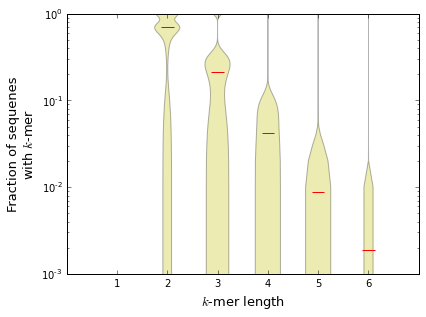

In [90]:
plot_fractions(fractions,
               save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/kmer-fractions.pdf')

** AUC curves **

native


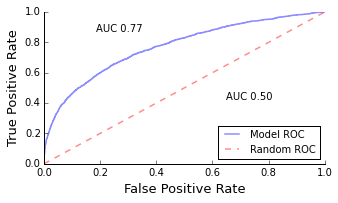

In [50]:
figure = '/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/auc-roc-native.pdf'
paper.plot_final_predictor_roc_performance(dataset_names=['native'], dataset_labels=[''], kmer_sizes=[4], save_filename=figure)

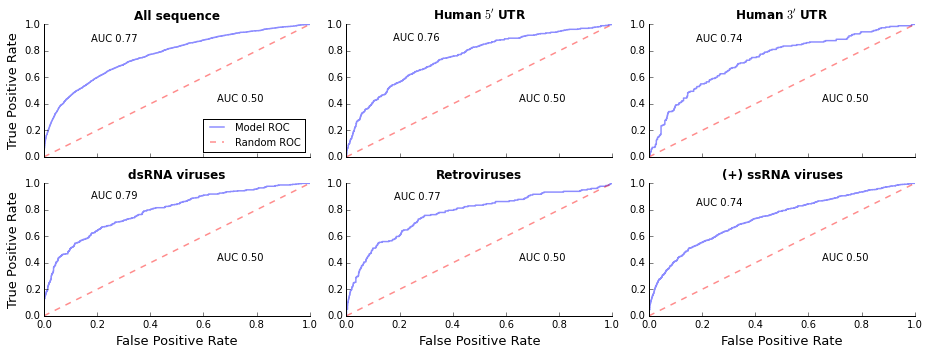

In [14]:
figure = '/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/auc-roc.pdf'
paper.plot_final_predictor_roc_performance(save_filename=figure)

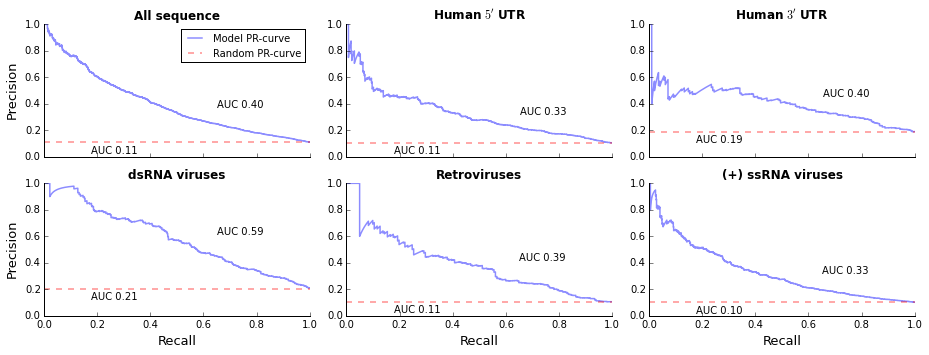

In [15]:
figure = '/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/auc-pr.pdf'
paper.plot_final_predictor_roc_performance(metric='pr', save_filename=figure)

** Changing the scatter plot into a density plot **

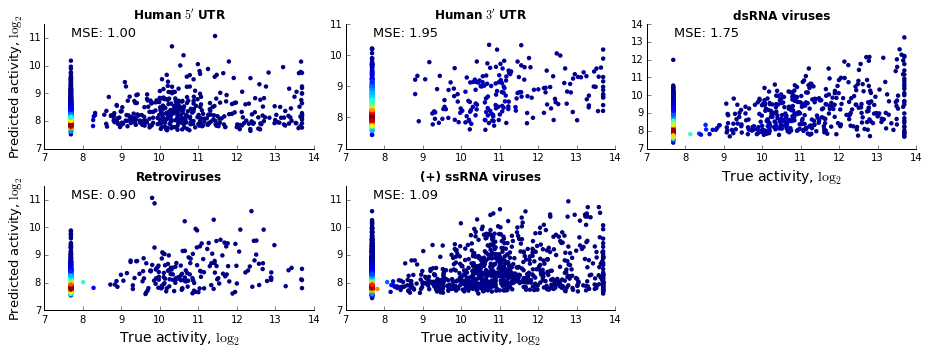

In [54]:
paper.plot_scatterplot_for_datasets(show_mse=True,
                                    save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/subgroups-scatter.pdf')

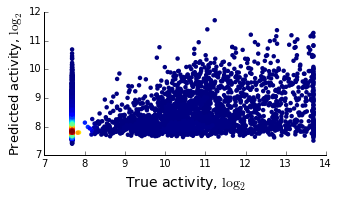

In [52]:
paper.plot_scatterplot_for_datasets(dataset_names=['native'],
                                    dataset_labels=[''],
                                    chosen_kmers=[4],
                                    show_mse=False,
                                    save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/native-scatter.pdf')

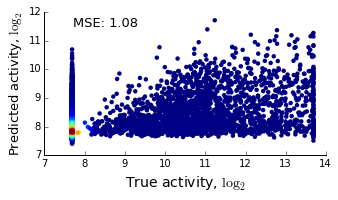

In [10]:
paper.plot_scatterplot_for_datasets(dataset_names=['native'],
                                    dataset_labels=[''],
                                    chosen_kmers=[4],
                                    show_mse=True)

** k-mer enrichment (Shira's version) **

In [8]:
def get_kmer_enrichment(dataset_name,
                        kmer_length,
                        alphabet=['A', 'C', 'T', 'G']):
    import lib.kmers
    import lib.persistent
    import lib.sa
    import pysais
    import scipy.stats
    
    alphabet_size = len(alphabet)
    start, stop = 0, 0
    for i in range(1, kmer_length):
        start += alphabet_size ** i
    stop = start + alphabet_size ** kmer_length
    
    dataset = lib.persistent.datasets[dataset_name]
    dataset = lib.tools.trim_sequences(dataset)  # Trim dataset sequences...
    activities = np.array([seq.ires_activity for seq in dataset])
    positive_indices = activities > np.min(activities)
    
    n_samples = len(dataset)
    str_length = len(dataset[0].sequence)
    sequence, assignment, sa, lcp, lcp_left, lcp_right = lib.sa.construct_SA(dataset)
    #sequence, assignment, sa, lcp, lcp_left, lcp_right = lib.persistent.precomputed[dataset_name]
    motif_num = start
    pvalues = {}
    while motif_num < stop:
        motif = lib.kmers._construct_motif(alphabet, motif_num)
        counts = pysais.count_position_occurrences(sequence,
                                                   motif,
                                                   assignment,
                                                   sa,
                                                   lcp,
                                                   lcp_left,
                                                   lcp_right,
                                                   n_samples,
                                                   str_length)
        counts = np.sum(counts, axis=1) > 0
        n_positive_with = np.sum(counts[positive_indices], dtype=np.int)
        n_positive_without = np.sum(~counts[positive_indices], dtype=np.int)
        n_negaitve_with = np.sum(counts[~positive_indices], dtype=np.int)
        n_negative_without = np.sum(~counts[~positive_indices], dtype=np.int)
        table = np.array([[n_positive_with, n_positive_without], [n_negaitve_with, n_negative_without]])
        odds_ratio, pvalue = scipy.stats.fisher_exact(table, alternative='two-sided')
        #coef_r, pvalue = scipy.stats.spearmanr(np.sum(counts, axis=1), activities)
        pvalues[motif] = pvalue
        motif_num += 1
    return pvalues

In [9]:
def get_kmers_for_dataset(dataset_name,
                          results=('without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2', 'kmers_kmers-windows', 'sqrt_eran_refined2-1k-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh'),
                          min_kmer_length=1,
                          max_kmer_length=4,
                          min_n_folds=10,
                          min_importance=0.1
                         ):
    import lib.tools
    import lib.interpretation
    configuration_name, feature_names, experiment = results

    def get_kmer(string):
        return string.split('-')[1]
    
    file_path = '../results/regression/%s/%s' % (configuration_name, dataset_name)
    filename_result = '%s/gbrf/%s-min_kmer_%d-max_kmer_%d-%s-final.out' % (file_path, feature_names, min_kmer_length, max_kmer_length, experiment)
    dataset_result = lib.reader.read_pickle(filename_result)
    dataset_importances = lib.tools.get_feature_importances(dataset_result, normalize=True)
    dataset_importances = lib.tools.average_importances(dataset_importances)
    importances = {key : value for key, value in dataset_importances.iteritems() if not 'window' in key}
    importances = {get_kmer(key): value[0] for key, value in importances.iteritems() if value[0] >= min_importance and value[1] >= min_n_folds}
    
    return importances

In [36]:
def format_pvalue(pvalue):
    if pvalue > 0.05:
        return '$p\\geq0.05$'
    elif pvalue < 0.01:
        exp = int(np.log10(pvalue)) + 1
        return '$p<10^{%d}$' % exp
    elif pvalue < 0.05:
        return 'p<0.05'
    elif pvalue < 0.01:
        return 'p<0.01'
    

In [43]:
def make_pvalue_dataframe(dataset_names, display_names, kmer_length=4, save_filename=None):
    import pandas as pd
    import seaborn as sns
    sns = reload(sns)
    
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    data_frames = []
    for dataset_name, display_name in zip(dataset_names, display_names):
        pvalues = get_kmer_enrichment(dataset_name, kmer_length)
        kmers = [kmer for kmer in get_kmers_for_dataset(dataset_name) if len(kmer) == kmer_length]
        
        df = pd.DataFrame({'kmer': pvalues.keys(), 'pvalue': pvalues.values()})
        df['Sequence group'] = display_name
        df['Distribution'] = 'All $k$-mers'
        data_frames.append(df)
        
        df = pd.DataFrame({'kmer': kmers, 'pvalue': [pvalues[kmer] for kmer in kmers]})
        df['Distribution'] = 'Predictive $k$-mers'
        df['Sequence group'] = display_name
        data_frames.append(df)
    
    df = pd.concat(data_frames)
    df['log_pvalue'] = -np.log10(df['pvalue']) 
    f, ax = plot.subplots(1, 1)
    ax = sns.violinplot(y='log_pvalue',
                        x='Sequence group',
                        hue='Distribution',
                        data=df,
                        palette='muted',
                        inner=None,
                        scale='area',
                        scale_hue=True,
                        split=True,
                        cut=0.0,
                        ax=ax)
    ax.set_ylabel('$-log_{10}$  $p$-value', fontsize=14)
    ax.set_xlabel('Sequence group', fontsize=14)
    ax.set_ylim((-0.05, 25))
    ax.legend(loc='upper left', prop={'size': 13})
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    
    import scipy.stats
    
    ymin, ymax = ax.get_ylim()
    span = ymax - ymin
    n = float(len(display_names))
    for i, group in enumerate(display_names):
        group_a = df.loc[(df['Sequence group'] == group) & (df['Distribution'] == 'All $k$-mers'), 'log_pvalue']
        group_b = df.loc[(df['Sequence group'] == group) & (df['Distribution'] == 'Predictive $k$-mers'), 'log_pvalue']
        up = max(np.max(group_a), np.max(group_b))
        stat, pvalue = scipy.stats.mannwhitneyu(group_a, group_b, alternative='less')
        ax.text((i + 0.5) / n,
                up / span + 0.09,
                format_pvalue(pvalue),
                horizontalalignment='center',
                verticalalignment='top',
                transform=ax.transAxes)
        print group, pvalue
    
    f.set_size_inches(10, 6.5, forward=True)
    f.tight_layout()
    if save_filename is not None:
        f.savefig(save_filename)

Human $5'$ UTR 0.000105236268616
Human $3'$ UTR 0.00230363744617
dsRNA viruses 0.00296999157062
Retroviruses 1.62158207968e-05
(+) ssRNA viruses 1.18656041015e-05


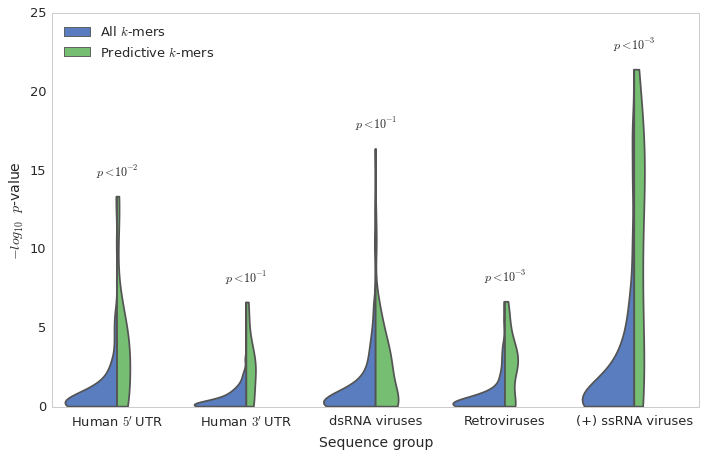

In [44]:
dataset_names = ['human_native_5utr',
                 'human_native_3utr',
                 'viral_native_dsRNA_all',
                 'viral_native_RTV',
                 'viral_native_ssRNA_positive']
display_names = ["Human $5'$ UTR",
                 "Human $3'$ UTR",
                 'dsRNA viruses',
                 'Retroviruses',
                 '(+) ssRNA viruses']
kmer_length = 4
make_pvalue_dataframe(dataset_names,
                      display_names,
                      kmer_length=kmer_length,
                      save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/kmer-enrichment-distributions.pdf')

** New piechart **

404 / 3816
123 / 1889
196 / 1035
408 / 1988
182 / 1714
777 / 7698
120 / 1897


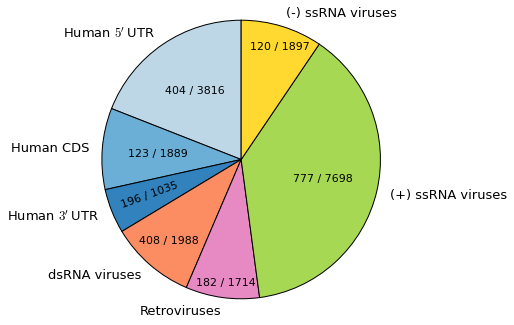

In [28]:
import paper
paper.plot_dataset_composition_piechart(save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/current/paper/dataset_composition-piechart.pdf')

native : 52.68 +/- 7.62%
human_native_5utr : 58.37 +/- 7.34%
human_native_3utr : 49.65 +/- 7.91%
viral_native_dsRNA_all : 53.38 +/- 8.23%
viral_native_RTV : 51.77 +/- 6.54%
viral_native_ssRNA_positive : 51.35 +/- 6.01%
native vs human_native_5utr :  RanksumsResult(statistic=-40.451942029869265, pvalue=0.0)
native vs human_native_3utr :  RanksumsResult(statistic=11.624192382303962, pvalue=3.105159960814118e-31)
native vs viral_native_dsRNA_all :  RanksumsResult(statistic=-3.2264145208030066, pvalue=0.0012535166819828871)
native vs viral_native_RTV :  RanksumsResult(statistic=4.3362704959113936, pvalue=1.4492058894859331e-05)
native vs viral_native_ssRNA_positive :  RanksumsResult(statistic=11.685423201433849, pvalue=1.5132395469596244e-31)
human_native_5utr vs human_native_3utr :  RanksumsResult(statistic=28.26242484008328, pvalue=1.0014908938129267e-175)
human_native_5utr vs viral_native_dsRNA_all :  RanksumsResult(statistic=21.690448741715787, pvalue=2.5251202002376316e-104)
human_nat

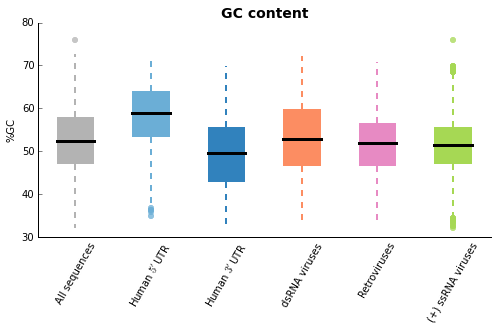

In [43]:
paper.plot_gc_content(save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/gc-new-colors.pdf')

[i] Chosen features:  ['count-C-RF_all', 'count-CC-RF_all', 'count-CCC-RF_all', 'count-CCCC-RF_all', 'count-CCCT-RF_all', 'count-CCTC-RF_all', 'count-CTCC-RF_all', 'count-TCCC-RF_all', 'count-TTCC-RF_all', 'count-TCTC-RF_all', 'count-TCCT-RF_all', 'count-CTCT-RF_all', 'count-CCTT-RF_all', 'count-CTTC-RF_all']


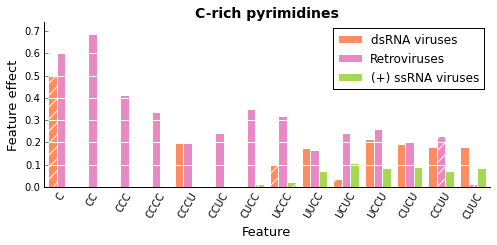

In [45]:
paper.plot_pyrimidines_features_partial_dependence(save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2/pcb_review/viral-features-new-colors.pdf')

** New train-test score figure **

In [39]:
dataset_name = 'native'
min_kmer_length, max_kmer_length = 1, 4
configuration_name, feature_names, experiment = 'without-nan-splicing-trimmed_activity0.995-long-multiple_testing-redo2', 'kmers_kmers-windows', 'sqrt_eran_refined2-1k-minimum_fraction_0.1-cutoff_0.05-correction_method_fdr_bh'
file_path = '../results/regression/%s/%s' % (configuration_name, dataset_name)
filename = '%s/gbrf/%s-min_kmer_%d-max_kmer_%d-%s-final.out' % (file_path, feature_names, min_kmer_length, max_kmer_length, experiment)
res = lib.reader.read_pickle(filename)

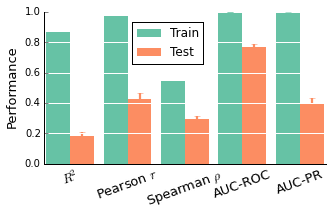

In [8]:
paper.plot_regression_performance_for_datasets(dataset_names=['native'],
                                               dataset_labels=[''],
                                               chosen_kmers=[4],
                                               save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/current/paper/performance/native-big.pdf')

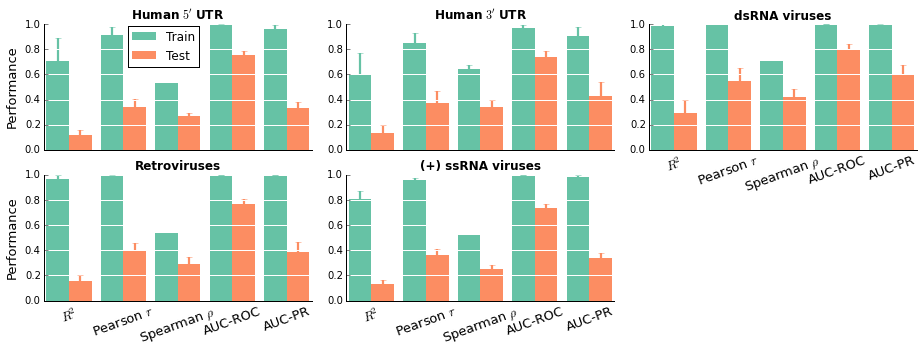

In [9]:
paper.plot_regression_performance_for_datasets(save_filename='/home/nfs/alexeygritsenk/src/IRES_Predictor/figures/current/paper/performance/subgroups.pdf')

** Positive fraction **

In [13]:
ds = lib.persistent.datasets['native']

In [15]:
min_activity = np.min([seq.ires_activity for seq in ds])
n_samples = len(ds)
n_positives = len([seq for seq in ds if seq.ires_activity > min_activity])
percent = (100.0 * n_positives) / n_samples

print 'Positives: %d / %d (%.2f%%)' % (n_positives, n_samples, percent)

Positives: 2298 / 20872 (11.01%)


** Monthly cost calculations **

In [3]:
watts = 860
hours_per_month = 24 * 30.5
#cost_per_watt_hour = 0.19
cost_per_watt_hour = 0.075

monthly_cost = watts * hours_per_month / 1000.0 * cost_per_watt_hour
print '[i] Monthly cost: %d' % monthly_cost

[i] Monthly cost: 47
